In [1]:
import os, sys, logging

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from fa_discrete import *  

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)


# Softened FA Model

In [2]:
eps = 0.00
time_step = 0.005

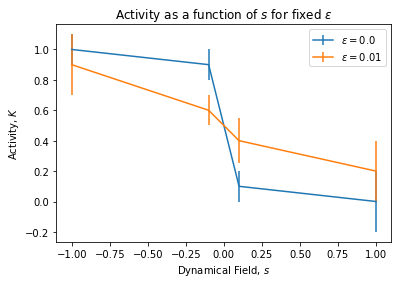

In [3]:
draw_activity_for_fixed_eps(eps, np.array([-1., -.1, .1, 1.]), np.array([1., .9, .1, 0.]), activity_errs=np.array([.1, .1, .1, .2]))
draw_activity_for_fixed_eps(0.01, np.array([-1., -.1, .1, 1.]), np.array([.9, .6, .4, .2]), activity_errs=np.array([.2, .1, .15, .2]))

plt.show()

INFO:root:Biasing field: 0.1
INFO:root:Rate swap: 0.980668518671
INFO:root:Rate Flip (activation) [1, 0, 1]-> [1, 1, 1]: 0.5
INFO:root:Rate Flip (deaactivation)[1, 1, 1]-> [1, 0, 1]: 2.0 
INFO:root:Rate swap [1, 0, 1] -> [1, 1, 0]: 0.980668518671
INFO:root:Rate swap [1, 1, 1] -> [1, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [1, 0, 0]-> [1, 1, 0]: 0.25
INFO:root:Rate Flip (deaactivation)[1, 1, 0]-> [1, 0, 0]: 1.0 
INFO:root:Rate swap [1, 0, 0] -> [1, 0, 0]: 0.0
INFO:root:Rate swap [1, 1, 0] -> [1, 0, 1]: 0.980668518671
INFO:root:Rate Flip (activation) [0, 0, 1]-> [0, 1, 1]: 0.25
INFO:root:Rate Flip (deaactivation)[0, 1, 1]-> [0, 0, 1]: 1.0 
INFO:root:Rate swap [0, 0, 1] -> [0, 1, 0]: 0.980668518671
INFO:root:Rate swap [0, 1, 1] -> [0, 1, 1]: 0.0
INFO:root:Rate Flip (activation) [0, 0, 0]-> [0, 1, 0]: 0.0
INFO:root:Rate Flip (deaactivation)[0, 1, 0]-> [0, 0, 0]: 0.0 
INFO:root:Rate swap [0, 0, 0] -> [0, 0, 0]: 0.0
INFO:root:Rate swap [0, 1, 0] -> [0, 0, 1]: 0.980668518671


alpha -0.734010954074, g -0.956014019006


fa_discrete.py:290: RuntimeWarning: divide by zero encountered in divide
  times = -np.log(1 - np.random.uniform(size=rates.size)) / rates


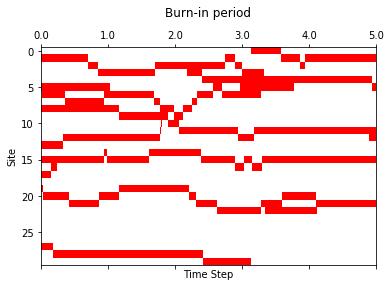

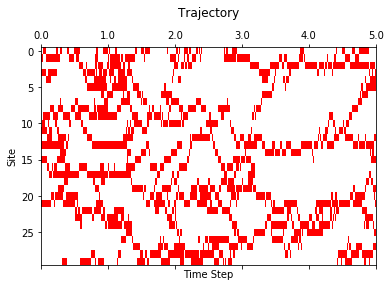

SEJveChjaGlsZHJlbj0oRmxvYXRQcm9ncmVzcyh2YWx1ZT0wLjAsIGRlc2NyaXB0aW9uPXUnRXF1aWxpYnJhdGluZyBUUFMnLCBzdHlsZT1Qcm9ncmVzc1N0eWxlKGRlc2NyaXB0aW9uX3dpZHTigKY=


In [ ]:
s = .1

logging.basicConfig(level=logging.INFO)

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000, time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)
#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
activity_avg, activity_err = tps.mc_analysis(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

print("Average Activity: {}; Activity Error: {}".format(activity_avg, activity_err))

In [ ]:
s = -1.

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000,time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)

#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
tps.mc_average(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

In [ ]:
s = 0.005

fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=10000,time_step=time_step)
tps = SoftenedFATPS(fa_kcm, fa_kcm.activity_intensive)
#tps = SoftenedFATPS(fa_kcm, lambda t, o: fa_kcm.fixed_time_activity(t, o, 250.))
tps.mc_average(num_samples=10, num_burnin_steps=100, draw=True, draw_every=10)

ss = np.arange(0, 0.008, 0.001)

#logging.basicConfig(level=logging.INFO)
eps = 0.0063

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=30, num_steps=1000)
    print("crit s", fa_kcm.get_critical_s())
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

ss = np.array([-1., -1e-1, -1e-3, -1e-4, 1e-4, 1e-3, 1e-1, 1.])

eps = 0.

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    print("crit s", fa_kcm.get_critical_s())

    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

ss = np.array([-1., -1e-1, -1e-2, -1e-3, -5e-4, -1e-4, 1e-4, 5e-4,1e-3, 1e-2, 1e-1, 1.])

#logging.basicConfig(level=logging.INFO)
eps = 0.001

activities = np.zeros(ss.size)
for i,s in enumerate(ss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
        # draw_trajectory(trajectory, occupation_times)
   
plt.plot(ss, activities, )
plt.xlabel("s")
plt.ylabel("K")
plt.title("Activity with s for fixed epsilon = {}".format(eps))

s = 0.
#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 5e-5, 1e-5, 5e-4, 1e-4,5e-3,1e-3, 1e-1])


activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=10)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)
   
plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))

s = 0.01
#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 1e-5, 1e-4, 1e-3, 1e-1, 0.2])


activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, s=s, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=100)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)
   
plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))

#logging.basicConfig(level=logging.INFO)
epss = np.array([0., 1e-5, 1e-4, 1e-3, 1e-1, 0.2])
ss = np.zeros(epss.size)

activities = np.zeros(epss.size)
for i, eps in enumerate(epss):
    #print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
    fa_kcm = SoftenedFA(gamma=0.25, eps=eps, num_burnin_steps=1000, num_sites=60, num_steps=1000)
    ss[i] = fa_kcm.s
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    activities[i] = tps.mc_average(10, num_burnin_steps=100)
    print("Activity: {}".format(activities[i]))
    # draw_trajectory(trajectory, occupation_times)


plt.plot(epss, activities)
plt.xlabel("eps")
plt.ylabel("K")
plt.title("Activity with epsilon for fixed s = {}".format(s))
plt.show()

plt.plot(epss, ss)
plt.xlabel("eps")
plt.ylabel("s")
plt.title("Critical biasing field for epsilon".format(s))
plt.show()